# This is a copy of the original Python Code
### Scroll to the bottom, define two variables (datafile1 and datafile2) and a file pathname (pathname), then type in plotdata(datafile1, datafile2, pathname) and hit enter.

In [1]:
#Imports
import numpy, h5py, matplotlib
import matplotlib.pyplot as plt
import os
import scipy.signal as sp
import numpy as np
import bead_util as bu
%matplotlib notebook

In [10]:
NFFT = 2**17

In [2]:
def getdata(fname):
    "Opens the data file and turns it into usable data."
    print "Opening file: ", fname
    f = h5py.File(fname,'r')
    dset = f['beads/data/pos_data']
    dat = numpy.transpose(dset)
    Fs = dset.attrs['Fsamp']
    dat = dat * 10./(2**15 - 1)

    xpsd, freqs = matplotlib.mlab.psd(dat[:, 0]-numpy.mean(dat[:, 0]), Fs = Fs, NFFT = NFFT) 
    ypsd, freqs = matplotlib.mlab.psd(dat[:, 1]-numpy.mean(dat[:, 1]), Fs = Fs, NFFT = NFFT)
    zpsd, freqs = matplotlib.mlab.psd(dat[:, 2]-numpy.mean(dat[:, 2]), Fs = Fs, NFFT = NFFT)

    return [freqs, xpsd, ypsd, dat, zpsd]

In [7]:
def plotdata( refname, fname0, path ):
    "Generates plots from data"
    make_plot_vs_time = True
    conv_fac = 4.4e-14
    if fname0 == "":
        file_list = bu.time_ordered_file_list(path)
        print len(file_list)
        fname0 = file_list[-1]

    Fs = 10e3  ## this is ignored with HDF5 files
    NFFT = 2**11

    data0 = getdata(os.path.join(path, fname0))

    if refname:
        data1 = getdata(os.path.join(path, refname))
    Fs = 10000
    b, a = sp.butter(1, [2*5./Fs, 2*10./Fs], btype = 'bandpass')

    if make_plot_vs_time:

        fig = plt.figure()
        plt.subplot(3, 1, 1)

        plt.plot(data0[3][:,0] - np.mean(data0[3][:, 0]) )
        if(refname):
                plt.plot(data1[3][:, 0] - np.mean(data1[3][:, 0]) )

        plt.subplot(3, 1, 2)
        plt.plot(data0[3][:, 1] - np.mean(data0[3][:, 1]) )
        if(refname):
                plt.plot(data1[3][:, 1] - np.mean(data1[3][:, 1]) )

        plt.subplot(3, 1, 3)
        plt.plot(data0[3][:, 2] - np.mean(data0[3][:, 2]) )
        if(refname):
                plt.plot(data1[3][:, 2] - np.mean(data1[3][:, 2]) )
       

    fig = plt.figure()
    plt.subplot(3, 1, 1)
    plt.loglog(data0[0], np.sqrt(data0[1]),label="test")
    if refname:
        plt.loglog(data1[0], np.sqrt(data1[1]),label="ref")
    plt.ylabel("V$^2$/Hz")
    plt.legend(loc=3)
    plt.subplot(3, 1, 2)
    plt.loglog(data0[0], np.sqrt(data0[2]))
    if refname:
        plt.loglog(data1[0], np.sqrt(data1[2]))
    plt.subplot(3, 1, 3)
    plt.loglog(data0[0],  np.sqrt(data0[4]))
    if refname:
        plt.loglog(data1[0], np.sqrt(data1[4]))
    plt.ylabel("V$^2$/Hz")
    plt.xlabel("Frequency[Hz]")
    plt.show()
    return

18
Opening file:  /data/20170227/bead1/0_05mbar_xyzcool_neg.h5
Opening file:  /data/20170227/bead1/2_0mbar_xyzcool_neg.h5


<IPython.core.display.Javascript object>


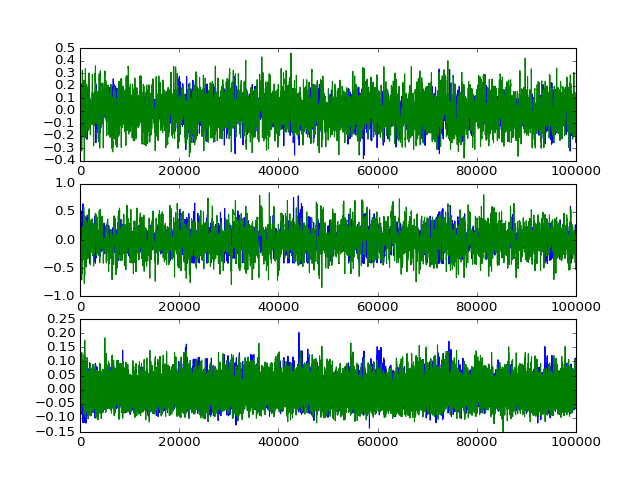

<IPython.core.display.Javascript object>


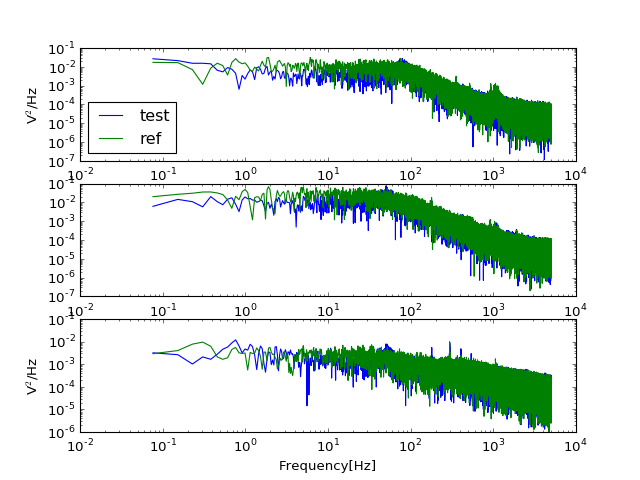

In [11]:
# Select the files to plot
# Make sure to add relevant data in the comments
# Here are two examples:
refname = "2_0mbar_xyzcool_neg.h5"
fname0 = ""
path = "/data/20170227/bead1"
plotdata(refname,fname0,path)

In [ ]:
refname = r""
fname0 = r"xout_100Hz_1.h5"
path = r"C:\Data\20170224\xy_test\feedback_test"
plotdata(refname,fname0,path)